In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [3]:
train_data=pd.read_csv(r'C:\Users\user\Downloads\train.csv_VsW9EGx\train.csv')
test_data=pd.read_csv(r'C:\Users\user\Downloads\test.csv_yAFwdy2\test.csv')
submission=pd.read_csv(r'C:\Users\user\Downloads\sample_submission_iA3afxn.csv')

In [4]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [7]:
from collections import Counter
from tqdm import tqdm
import os
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [8]:
print(train_data.shape)
print(test_data.shape)

(381109, 12)
(127037, 11)


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
train_data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [11]:
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
test_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [13]:
train_data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## EDA

In [14]:
train_data['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [15]:
print("Males interested in insurance % :", train_data[(train_data['Gender'] == 'Male') &  
    (train_data['Response'] == 1)]['id'].count()*100/train_data[train_data['Gender'] == 'Male']['id'].count())

print("Females interested in insurance % :", train_data[(train_data['Gender'] == 'Female') &  
    (train_data['Response'] == 1)]['id'].count()*100/train_data[train_data['Gender'] == 'Female']['id'].count())

Males interested in insurance % : 13.841107482689518
Females interested in insurance % : 10.390241115301109


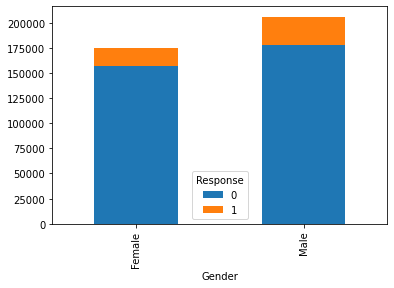

In [16]:
train_data.groupby(['Gender', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [17]:
test_data['Gender'].value_counts()

Male      68236
Female    58801
Name: Gender, dtype: int64

### Age

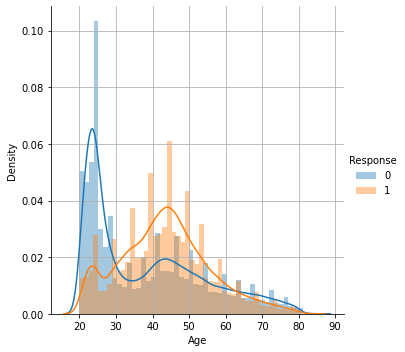

In [18]:
# how does age influence response 

sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Age').add_legend()
plt.grid()
plt.show()

People in age group > 30 are more likely to take vehicle insurance as compared to the people in the young age group <30 . So age is a valient feature.

### Driving License

<AxesSubplot:xlabel='Driving_License'>

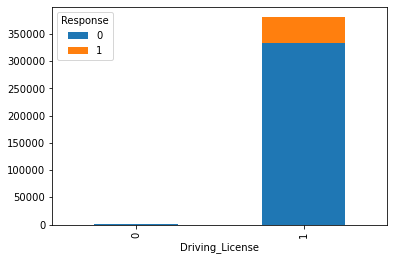

In [19]:
train_data.groupby(['Driving_License', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

Almost all of them having Driving License

### previously Insured

<AxesSubplot:xlabel='Previously_Insured'>

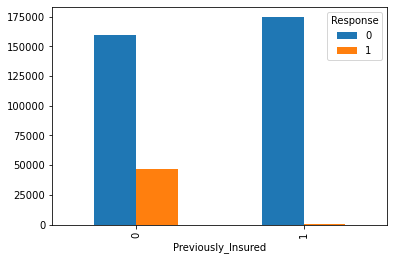

In [20]:
train_data.groupby(['Previously_Insured', 'Response']).size().unstack().plot(kind = 'bar')

Among the customers who already have their vehicle insured, almost all of them Responded NO. Among the customers who so not have have their vehicle insured, nearly 30% would want to get insured. So this parameter is good for prediction.

### Vehicle Age

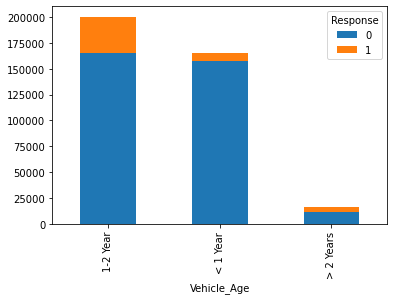

In [21]:
train_data.groupby(['Vehicle_Age','Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

If the age is less than 1 year, Customers are most likely to respond NO.

### vehicle damage

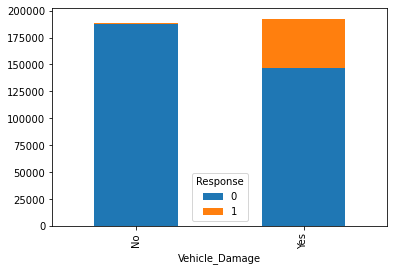

In [22]:
train_data.groupby(['Vehicle_Damage', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

Customers whose vehicle is NOT damaged in past are almost certainly going to respond NO for vehicle insurance. So, like 'Previously_Insured', 'Vehicle_Damage' in past turns out to be an excellent feature!

### Annual Premium

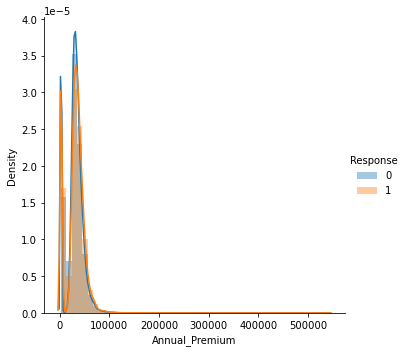

In [23]:
sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

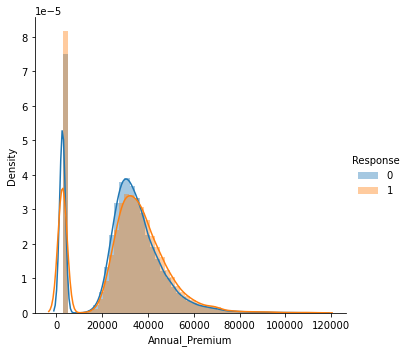

In [24]:
# Consider only upto 99.9 percentile 
sns.FacetGrid(data = train_data[train_data['Annual_Premium'] < np.percentile(train_data['Annual_Premium'], 99.9)], 
              hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

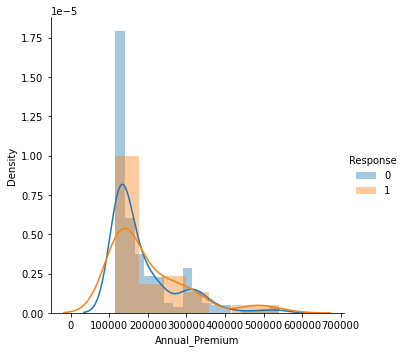

In [25]:
# Beyond 99.9 percentile 

sns.FacetGrid(data = train_data[train_data['Annual_Premium'] >= np.percentile(train_data['Annual_Premium'], 99.9)], 
              hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

There is no clear distinction here. So we cannot say anything conclusive from this univariate feature analysis. Due to presence of outlier values, we may need to scale this featue to minimize the effect of outlier.

### Policy Sales Channel

In [26]:
train_data['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [27]:
test_data['Policy_Sales_Channel'].value_counts()

152.0    44739
26.0     26894
124.0    24304
160.0     7311
156.0     3652
         ...  
6.0          1
69.0         1
141.0        1
33.0         1
58.0         1
Name: Policy_Sales_Channel, Length: 145, dtype: int64

Too much variability! We will handle this feature by response encoding or One hot encoding

### Vintage

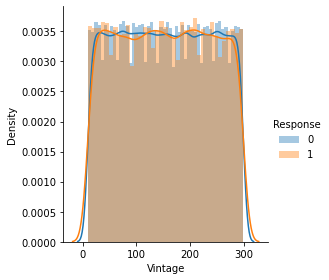

In [28]:
sns.FacetGrid(data = train_data, hue = 'Response', height = 4).map(sns.distplot, 'Vintage').add_legend()
plt.show()

There is a very high overlap. Clearly, this feature alone is very bad for perdiction.

## Data PreProcessing

In [29]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [30]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### 1. Gender

In [31]:
# train data
X_train_gender = train_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
X_train_gender = X_train_gender.values.reshape(-1, 1)

# test data
X_test_gender = test_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
X_test_gender = X_test_gender.values.reshape(-1, 1)

print(X_train_gender.shape)
print(X_test_gender.shape)

(381109, 1)
(127037, 1)


### 2. Age

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data['Age'].values.reshape(-1, 1))
X_train_age = scaler.transform(train_data['Age'].values.reshape(-1, 1))
X_test_age = scaler.transform(test_data['Age'].values.reshape(-1, 1))

print(X_train_age.shape)
print(X_test_age.shape)

(381109, 1)
(127037, 1)


In [33]:
# no scaling

X_train_age_n = train_data['Age'].values.reshape(-1, 1)
X_test_age_n = test_data['Age'].values.reshape(-1, 1)

print(X_train_age_n.shape)
print(X_test_age_n.shape)

(381109, 1)
(127037, 1)


Feature engineering: new categorical feature for Age

In [34]:
# train data
X_train_age_cat = train_data['Age'].apply(lambda x: 1 if x >= 30 else 0)
X_train_age_cat = X_train_age_cat.values.reshape(-1, 1)

# test data
X_test_age_cat = test_data['Age'].apply(lambda x: 1 if x >= 30 else 0)
X_test_age_cat = X_test_age_cat.values.reshape(-1, 1)

print(X_train_age_cat.shape)
print(X_test_age_cat.shape)

(381109, 1)
(127037, 1)


### Driving License

In [35]:
X_train_license = train_data['Driving_License'].values.reshape(-1, 1)
X_test_license = test_data['Driving_License'].values.reshape(-1, 1)

print(X_train_license.shape)
print(X_test_license.shape)

(381109, 1)
(127037, 1)


### Region Code

In [36]:
# one-hot encoding 'Region code'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Region_Code'].values.reshape(-1, 1))

X_train_region_code = encoder.transform(train_data['Region_Code'].values.reshape(-1, 1))
X_test_region_code = encoder.transform(test_data['Region_Code'].values.reshape(-1, 1))

print(X_train_region_code.shape)
print(X_test_region_code.shape)

(381109, 53)
(127037, 53)


Note: In response coding, when we calculate the probability of a feature value belonging to a particular class.

In [37]:
# response encoding

def get_feat_dict(feature):
    value_count = train_data[feature].value_counts() # value counts of each feature
    my_dict = dict()  # initialize a dictionary
    for i, denominator in value_count.items():
        class_count = train_data[(train_data['Response'] == 1) & (train_data[feature] == i)]
        my_dict[i] = round((class_count.shape[0]/denominator), 6)
    return my_dict

In [38]:
region_code_dict = get_feat_dict('Region_Code')

In [39]:
pkn = train_data['Region_Code'].copy()
pkn = pkn.apply(lambda x: region_code_dict[x]) 
pkn

0         0.187163
1         0.127662
2         0.187163
3         0.112760
4         0.121776
            ...   
381104    0.072284
381105    0.079258
381106    0.073825
381107    0.090209
381108    0.123362
Name: Region_Code, Length: 381109, dtype: float64

In [40]:
# train data
X_train_region_code_resp = train_data['Region_Code'].apply(lambda x: region_code_dict[x])
X_train_region_code_resp = X_train_region_code_resp.values.reshape(-1, 1)

# test data
X_test_region_code_resp = test_data['Region_Code'].apply(lambda x: region_code_dict[x] if x in region_code_dict.keys() 
                                                                                       else np.median(list(region_code_dict.values())))
X_test_region_code_resp = X_test_region_code_resp.values.reshape(-1, 1)

print(X_train_region_code_resp.shape)
print(X_test_region_code_resp.shape)

(381109, 1)
(127037, 1)


### Previosly insured

In [41]:
X_train_prev_ins = train_data['Previously_Insured'].values.reshape(-1, 1)
X_test_prev_ins = test_data['Previously_Insured'].values.reshape(-1, 1)

print(X_train_prev_ins.shape)
print(X_test_prev_ins.shape)

(381109, 1)
(127037, 1)


### vehicle Age

In [42]:
# one-hot encoding 'Vehicle Age'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Vehicle_Age'].values.reshape(-1, 1))

X_train_vehicle_age = encoder.transform(train_data['Vehicle_Age'].values.reshape(-1, 1))
X_test_vehicle_age = encoder.transform(test_data['Vehicle_Age'].values.reshape(-1, 1))

print(X_train_vehicle_age.shape)
print(X_test_vehicle_age.shape)

(381109, 3)
(127037, 3)


In [43]:
# Lable encoding
X_train_vehicle_age_n = train_data['Vehicle_Age'].replace({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
X_train_vehicle_age_n = X_train_vehicle_age_n.values.reshape(-1, 1)

X_test_vehicle_age_n = test_data['Vehicle_Age'].replace({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
X_test_vehicle_age_n = X_test_vehicle_age_n.values.reshape(-1, 1)

In [44]:
# Response encoding
vehicle_age_dict = get_feat_dict('Vehicle_Age')
vehicle_age_dict

{'1-2 Year': 0.173755, '< 1 Year': 0.043705, '> 2 Years': 0.293746}

In [45]:
X_train_vehicle_age_resp = train_data['Vehicle_Age'].apply(lambda x: vehicle_age_dict[x])
X_train_vehicle_age_resp = X_train_vehicle_age_resp.values.reshape(-1, 1)

X_test_vehicle_age_resp = test_data['Vehicle_Age'].apply(lambda x: vehicle_age_dict[x])
X_test_vehicle_age_resp = X_test_vehicle_age_resp.values.reshape(-1, 1)

print(X_train_vehicle_age_resp.shape)
print(X_test_vehicle_age_resp.shape)

(381109, 1)
(127037, 1)


### vehicle damage

In [46]:
# train data
X_train_damage = train_data['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train_damage = X_train_damage.values.reshape(-1, 1)

# test data
X_test_damage = test_data['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
X_test_damage = X_test_damage.values.reshape(-1, 1)

print(X_train_damage.shape)
print(X_test_damage.shape)

(381109, 1)
(127037, 1)


### Annual Premium

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data['Annual_Premium'].values.reshape(-1, 1))
X_train_premium = scaler.transform(train_data['Annual_Premium'].values.reshape(-1, 1))
X_test_premium = scaler.transform(test_data['Annual_Premium'].values.reshape(-1, 1))

print(X_train_premium.shape)
print(X_test_premium.shape)

(381109, 1)
(127037, 1)


In [48]:
# no scale

X_train_premium_n = train_data['Annual_Premium'].values.reshape(-1, 1)
X_test_premium_n =  test_data['Annual_Premium'].values.reshape(-1, 1)

print(X_train_premium_n.shape)
print(X_test_premium_n.shape)

(381109, 1)
(127037, 1)


### Policy Sales Channel

In [49]:
# one-hot encoding 'Policy_Channel'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(train_data['Policy_Sales_Channel'].values.reshape(-1, 1))

X_train_sales_chnl = encoder.transform(train_data['Policy_Sales_Channel'].values.reshape(-1, 1))
X_test_sales_chnl = encoder.transform(test_data['Policy_Sales_Channel'].values.reshape(-1, 1))

print(X_train_sales_chnl.shape)
print(X_test_sales_chnl.shape)

(381109, 155)
(127037, 155)


In [50]:
# Response encoding
sales_chnl_dict = get_feat_dict('Policy_Sales_Channel')
sales_chnl_dict

{152.0: 0.028624,
 26.0: 0.199385,
 124.0: 0.189148,
 160.0: 0.02181,
 156.0: 0.215458,
 122.0: 0.173212,
 157.0: 0.268402,
 154.0: 0.245954,
 151.0: 0.031403,
 163.0: 0.304183,
 13.0: 0.147453,
 25.0: 0.199675,
 7.0: 0.113892,
 8.0: 0.082508,
 30.0: 0.110638,
 55.0: 0.149525,
 155.0: 0.320097,
 11.0: 0.089776,
 1.0: 0.032588,
 52.0: 0.109005,
 125.0: 0.123782,
 15.0: 0.087838,
 29.0: 0.125741,
 12.0: 0.168582,
 120.0: 0.084525,
 24.0: 0.132,
 31.0: 0.253566,
 14.0: 0.101286,
 153.0: 0.059308,
 61.0: 0.096718,
 3.0: 0.304015,
 16.0: 0.086042,
 60.0: 0.102515,
 4.0: 0.200393,
 158.0: 0.27439,
 23.0: 0.137441,
 22.0: 0.054217,
 150.0: 0.24359,
 10.0: 0.189394,
 19.0: 0.085586,
 136.0: 0.216216,
 147.0: 0.184783,
 109.0: 0.12,
 145.0: 0.132184,
 9.0: 0.100592,
 18.0: 0.035928,
 91.0: 0.183544,
 116.0: 0.116883,
 37.0: 0.098684,
 21.0: 0.081081,
 139.0: 0.090909,
 128.0: 0.094891,
 42.0: 0.19697,
 59.0: 0.19685,
 138.0: 0.096774,
 131.0: 0.115702,
 127.0: 0.072727,
 140.0: 0.065421,
 113.0

In [51]:
# test 
pkn = train_data['Policy_Sales_Channel'].copy()
pkn = pkn.apply(lambda x: sales_chnl_dict[x]) 
pkn

0         0.199385
1         0.199385
2         0.199385
3         0.028624
4         0.028624
            ...   
381104    0.199385
381105    0.028624
381106    0.021810
381107    0.189148
381108    0.199385
Name: Policy_Sales_Channel, Length: 381109, dtype: float64

In [52]:
X_train_sales_chnl_resp = train_data['Policy_Sales_Channel'].apply(lambda x: sales_chnl_dict[x])
X_train_sales_chnl_resp = X_train_sales_chnl_resp.values.reshape(-1, 1)

X_test_sales_chnl_resp = test_data['Policy_Sales_Channel'].apply(lambda x: sales_chnl_dict[x] if x in sales_chnl_dict.keys() 
                                                                                              else np.median(list(sales_chnl_dict.values())))
X_test_sales_chnl_resp = X_test_sales_chnl_resp.values.reshape(-1, 1)

print(X_train_sales_chnl_resp.shape)
print(X_test_sales_chnl_resp.shape)

(381109, 1)
(127037, 1)


### Vintage

In [53]:
scaler = MinMaxScaler()
scaler.fit(train_data['Vintage'].values.reshape(-1, 1))
X_train_vintage = scaler.transform(train_data['Vintage'].values.reshape(-1, 1))
X_test_vintage = scaler.transform(test_data['Vintage'].values.reshape(-1, 1))

print(X_train_vintage.shape)
print(X_test_vintage.shape)

(381109, 1)
(127037, 1)


In [54]:
X_train_vintage_n = train_data['Vintage'].values.reshape(-1, 1)
X_test_vintage_n =  test_data['Vintage'].values.reshape(-1, 1)

print(X_train_vintage_n.shape)
print(X_test_vintage_n.shape)

(381109, 1)
(127037, 1)


## Stacking all features

In [55]:
# Set 1: Label encoded + One hot encoded categorical features + scaled numerical features
y_train = train_data['Response'].values
from scipy.sparse import hstack

X_train_ohe = hstack((X_train_gender, X_train_age, X_train_license, X_train_region_code, X_train_prev_ins, 
                       X_train_vehicle_age, X_train_damage, X_train_premium, X_train_sales_chnl, X_train_vintage))

X_test_ohe = hstack((X_test_gender, X_test_age, X_test_license, X_test_region_code, X_test_prev_ins, 
                      X_test_vehicle_age, X_test_damage, X_test_premium, X_test_sales_chnl, X_test_vintage)) 

print("train data shape:", (X_train_ohe.shape, y_train.shape))
print("test data shape:", X_test_ohe.shape)

train data shape: ((381109, 218), (381109,))
test data shape: (127037, 218)


In [56]:
# Set 2: Label encoded + Response encoded categorical features + numerical features
X_train_r = np.hstack((X_train_gender, X_train_age_n, X_train_age_cat, X_train_license, X_train_region_code_resp, X_train_prev_ins, 
                       X_train_vehicle_age_resp, X_train_damage, X_train_premium_n, X_train_sales_chnl_resp, X_train_vintage_n))

X_test_r = np.hstack((X_test_gender, X_test_age_n, X_test_age_cat, X_test_license, X_test_region_code_resp, X_test_prev_ins, 
                      X_test_vehicle_age_resp, X_test_damage, X_test_premium_n, X_test_sales_chnl_resp, X_test_vintage_n)) 

print("train data shape:", (X_train_r.shape, y_train.shape))
print("test data shape:", X_test_r.shape)

train data shape: ((381109, 11), (381109,))
test data shape: (127037, 11)


# Building Machine learning model

### With Set 1 features

### Logistic Regression using SGD

In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

sgd = SGDClassifier(loss = 'log', class_weight = 'balanced') # default penalty is L2 
parameter = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train_ohe, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(class_weight='balanced', loss='log'),
             n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc')

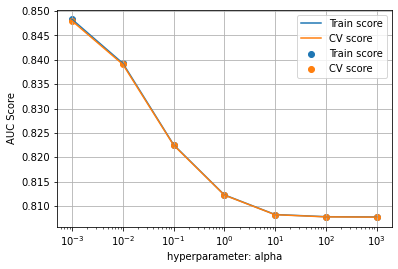

In [58]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

In [59]:
# With only L1 regularization
sgd = SGDClassifier(loss = 'log', class_weight = 'balanced',  l1_ratio = 1 ) 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train_ohe, y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(class_weight='balanced', l1_ratio=1,
                                     loss='log'),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='roc_auc')

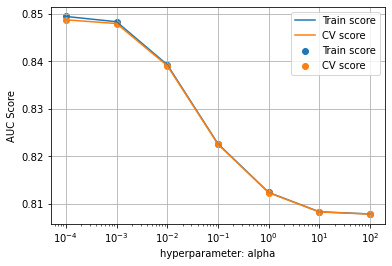

In [60]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

### Linear SVM classifier using SGD

In [61]:
sgd = SGDClassifier(loss = 'hinge', class_weight = 'balanced') 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train_ohe, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(class_weight='balanced'), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='roc_auc')

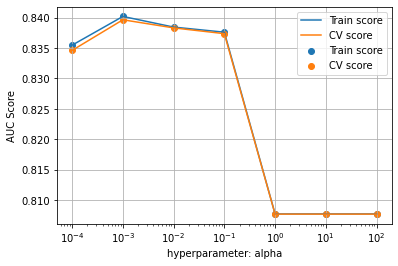

In [62]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

### Logistic Regression with default parameters

In [63]:
from sklearn.metrics import roc_auc_score

sgd_clf = SGDClassifier(loss = 'log', class_weight= 'balanced', random_state = 42) # default penalty is L2
sgd_clf.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(sgd_clf, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8497618871619649


In [64]:
# Using Response encoding
from sklearn.metrics import roc_auc_score

sgd_clf = SGDClassifier(loss = 'log', class_weight= 'balanced', random_state = 42) # default penalty is L2
sgd_clf.fit(X_train_r, y_train)
sig_clf = CalibratedClassifierCV(sgd_clf, method = "sigmoid")
sig_clf.fit(X_train_r, y_train)

y_pred_train = sig_clf.predict_proba(X_train_r)
y_pred_test = sig_clf.predict_proba(X_test_r)

print("Train Score with Response encoding:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score with Response encoding: 0.5


In [65]:
sgd_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
sgd_df.head()

,id,Response
0,381110,0.122573
1,381111,0.122573
2,381112,0.122573
3,381113,0.122573
4,381114,0.122573


In [66]:
# setting the path in the system
my_path = 'C:/Users/user/Downloads/'

In [67]:
sgd_df.to_csv(my_path + 'logistic_sgd_l2.csv', index = False)

### Random Forest

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier(n_estimators = 250, max_depth = 15, random_state = 101, n_jobs = -1) 
rfc.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(rfc, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8771451618117149


In [72]:
rfc_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
rfc_df.head()

,id,Response
0,381110,0.010267
1,381111,0.337561
2,381112,0.309732
3,381113,0.015867
4,381114,0.010300


In [73]:
rfc_df.to_csv(my_path + 'rfc_ohe.csv', index = False)

### XGBoost Classifier (without hyperparameter tuning)

In [76]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators = 150, max_depth = 11, colsample_bytree = 0.6, n_jobs = -1, random_state = 21)
xgb.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(xgb, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.9239243800063169


In [77]:
xgb_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
xgb_df.head()

,id,Response
0,381110,0.033058
1,381111,0.431747
2,381112,0.213273
3,381113,0.039385
4,381114,0.033055


In [78]:
xgb_df.to_csv(my_path + 'xgb_ohe.csv', index = False)